In [36]:
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('stopwords') # For removing common words
nltk.download('averaged_perceptron_tagger') # For Part-of-Speech tagging (used in lemmatization)
nltk.download('wordnet') # For lemmatization
! python -m textblob.download_corpora
# Sample reviews with associated sentiment (as provided)

[nltk_data] Downloading package punkt to /Users/narai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/narai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/narai/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/narai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


zsh:1: command not found: python


In [37]:
import pandas as pd
df = pd.read_csv("datasets/amazon_review.csv")
df

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1
...,...,...
19995,this app is fricken stupid.it froze on the kin...,0
19996,Please add me!!!!! I need neighbors! Ginger101...,1
19997,love it! this game. is awesome. wish it had m...,1
19998,I love love love this app on my side of fashio...,1


1.   Can you perform a sentiment analysis on the collection of product reviews, classify each one as 'positive', 'negative', or 'neutral', and then generate a bar chart to visualize the distribution of these sentiments?"

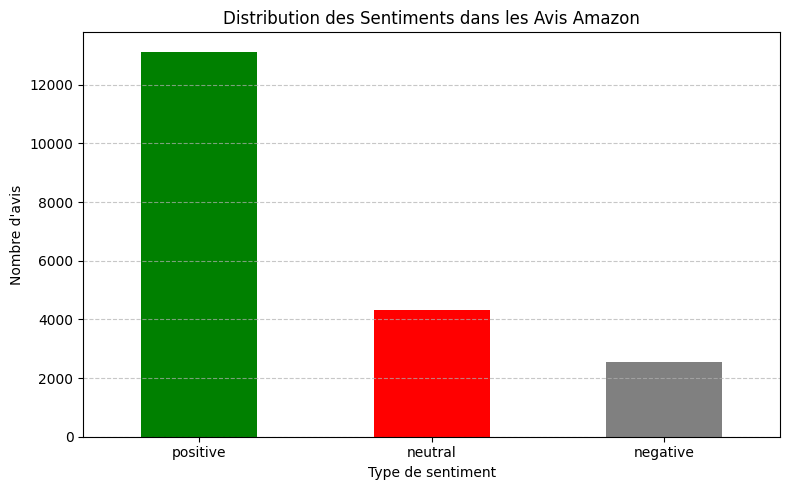

In [38]:
import pandas as pd
from textblob import TextBlob
import matplotlib.pyplot as plt

df = pd.read_csv("datasets/amazon_review.csv")

def get_sentiment(text):
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity

    if polarity > 0.1:
        return 'positive'
    elif polarity < -0.1:
        return 'negative'
    else:
        return 'neutral'

df['Sentiment'] = df['reviewText'].astype(str).apply(get_sentiment)

sentiment_counts = df['Sentiment'].value_counts()

plt.figure(figsize=(8, 5))
sentiment_counts.plot(kind='bar', color=['green', 'red', 'gray'])

plt.title('Distribution des Sentiments dans les Avis Amazon')
plt.xlabel('Type de sentiment')
plt.ylabel('Nombre d\'avis')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

2.   convert the text to lowercase, remove punctuation and numbers, filter out common stopwords, and then lemmatize the remaining words using their appropriate part-of-speech tags.

In [41]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag, word_tokenize
import re

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger_eng')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return 'a'
    elif tag.startswith('V'):
        return 'v'
    elif tag.startswith('N'):
        return 'n'
    elif tag.startswith('R'):
        return 'r'
    else:
        return 'n'

def preprocess_text(text):
    text = text.lower()

    text = re.sub(r'[^a-z\s]', '', text)

    tokens = word_tokenize(text)

    tokens = [word for word in tokens if word not in stop_words]

    pos_tags = pos_tag(tokens)
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(tag)) for word, tag in pos_tags]

    return ' '.join(lemmatized_words)

df['Cleaned_Review'] = df['reviewText'].astype(str).apply(preprocess_text)

[nltk_data] Downloading package punkt to /Users/narai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/narai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /Users/narai/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /Users/narai/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


3. After the text has been fully preprocessed and lemmatized, could you calculate the frequency of each unique word and then display a bar graph showing the top 15 most common words?


/var/folders/b_/_l4lfz09647btk2lchrd54_00000gn/T/ipykernel_11998/2257141893.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=list(words), y=list(counts), palette="viridis")
/var/folders/b_/_l4lfz09647btk2lchrd54_00000gn/T/ipykernel_11998/2257141893.py:18: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) Arial.
  plt.tight_layout()
/Users/narai/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128285 (\N{TOP WITH UPWARDS ARROW ABOVE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


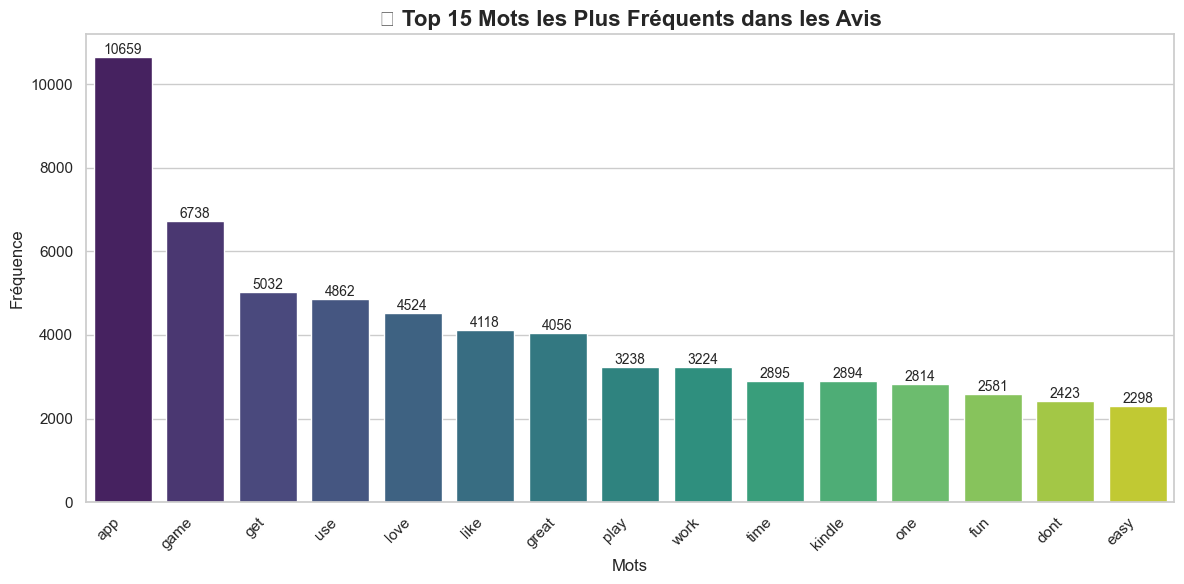

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

words, counts = zip(*most_common_words)

plt.figure(figsize=(12, 6))
barplot = sns.barplot(x=list(words), y=list(counts), palette="viridis")

for i, count in enumerate(counts):
    plt.text(i, count + 1, str(count), ha='center', va='bottom', fontsize=10)

plt.title("🔝 Top 15 Mots les Plus Fréquents dans les Avis", fontsize=16, fontweight='bold')
plt.xlabel("Mots", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()

4. generate a word cloud based on the entire corpus of lemmatized review words to provide a visual summary of the most prominent terms.

/Users/narai/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 9729 (\N{CLOUD}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/narai/Library/Python/3.9/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 65039 (\N{VARIATION SELECTOR-16}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


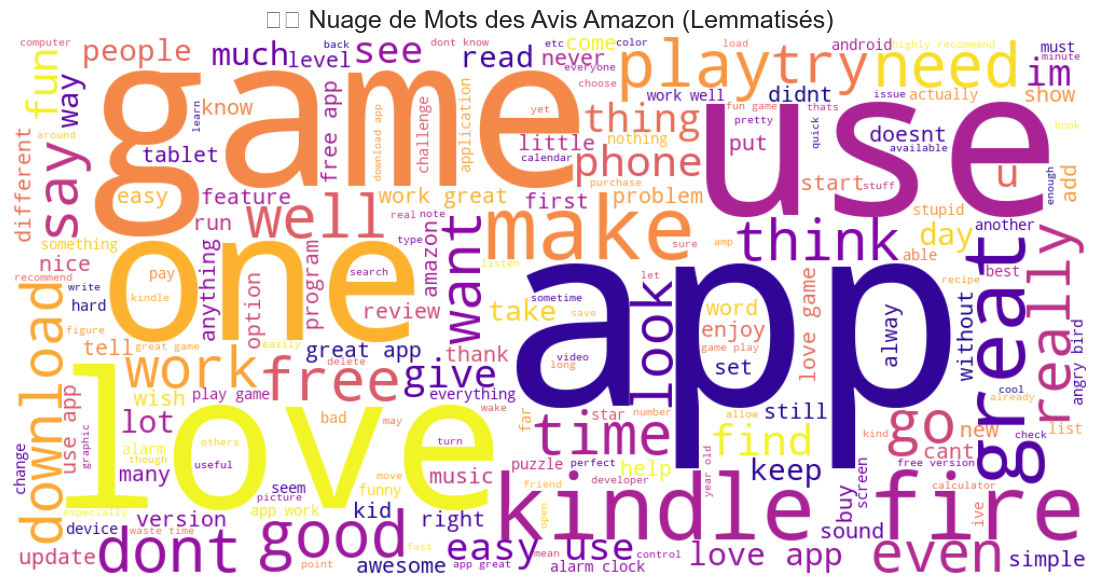

In [44]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

lemmatized_text = ' '.join(df['Cleaned_Review'])

wordcloud = WordCloud(width=1000, height=500,
                      background_color='white',
                      colormap='plasma',
                      max_words=200,
                      contour_width=2,
                      contour_color='black').generate(lemmatized_text)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('☁️ Nuage de Mots des Avis Amazon (Lemmatisés)', fontsize=18)
plt.show()

5. Visualize the frequency of nouns, verbs, adjectives in this text.

/var/folders/b_/_l4lfz09647btk2lchrd54_00000gn/T/ipykernel_11998/4149865261.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(pos_counts.keys()), y=list(pos_counts.values()), palette='coolwarm')


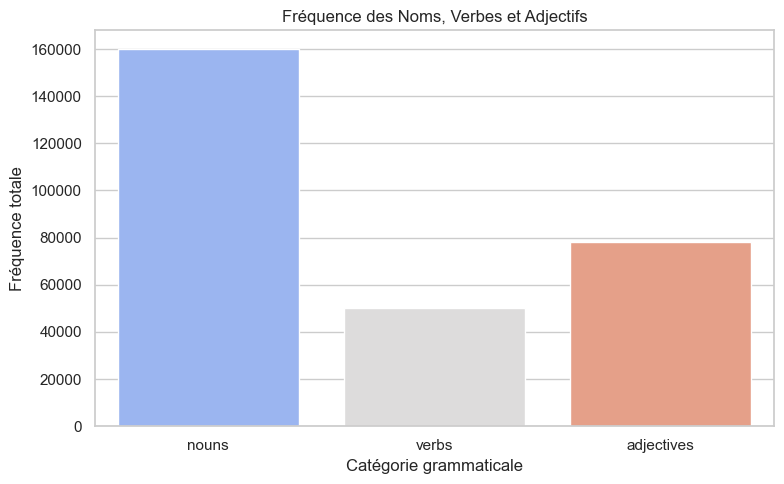

In [45]:
import nltk
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

all_tokens = ' '.join(df['Cleaned_Review']).split()
pos_tags = nltk.pos_tag(all_tokens, lang='eng')

pos_map = {
    'nouns': ['NN', 'NNS', 'NNP', 'NNPS'],
    'verbs': ['VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ'],
    'adjectives': ['JJ', 'JJR', 'JJS']
}

pos_counts = {'nouns': 0, 'verbs': 0, 'adjectives': 0}
for word, tag in pos_tags:
    for key, tags in pos_map.items():
        if tag in tags:
            pos_counts[key] += 1

sns.set(style="whitegrid")
plt.figure(figsize=(8, 5))
sns.barplot(x=list(pos_counts.keys()), y=list(pos_counts.values()), palette='coolwarm')

plt.title("Fréquence des Noms, Verbes et Adjectifs")
plt.xlabel("Catégorie grammaticale")
plt.ylabel("Fréquence totale")
plt.tight_layout()
plt.show()